# GATE SIMULATION
###                              data preprocessing
                                                 made by Yangsuseong and Hongyonggi
                                                 
변수 선언 및 실행 함수는 아래 있음.

In [1]:
import os, glob, csv, codecs
import shutil
import re
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import pprint
from collections import OrderedDict

In [2]:
# 리스트 청크 함수 (리스트, 원하는 길이)
# 이거 하고나면 차원이 하나가 더 생겨서 언패킹함수를 사용하여 차원축소를 해야함
# dat_list.append(list(chunks(dat_list_pre, 3)))
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

In [3]:
# 차원 축소 함수
# dat_list = list(itertools.chain(*dat_list))
def chain(*iterables):
    # chain('ABC', 'DEF') --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element


#실제 데이터를 알맞는 form으로 바꾸는 함수
def make_form(dat_list_xyz, dat_len):
    for i in range(dat_len):
        for j in range(2):
            for k in range(3):
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-06"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-6) * 0.1)
                    #print("e-06 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-05"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-5)* 0.1)
                    #print("e-05 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-04"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-4)* 0.1)
                    #print("e-04 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-03"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-3)* 0.1)
                    #print("e-03 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-02"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-2)* 0.1)
                    #print("e-02 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-01"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-1)* 0.1)
                    #print("e-01 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+00"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4])* 0.1)
                    #print("e+00 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+01"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10)* 0.1)
                    #print("e+01 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+02"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**2)* 0.1)
                    #print("e+02 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+03"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**3)* 0.1)
                    #print("e+03 complete")
    #print("Complete") 
    #print("=================")
    return dat_list_xyz

In [4]:
#실제 데이터를 알맞는 form으로 바꾸는 함수
def make_form(dat_list_xyz, dat_len):
    for i in range(dat_len):
        for j in range(2):
            for k in range(3):
                for l in range(20):
                    if(l < 10):
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e+0"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** int(l)) * 0.1)
                            #print(dat_list_xyz[i][j][k])
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e-0"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** -int(l)) * 0.1)
                    elif(l >= 10):
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e+"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** int(l)) * 0.1)
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e-"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** -int(l)) * 0.1)
                        
                
               
    return dat_list_xyz

In [5]:
# 각 크리스탈의 중심값을 얻어내기위한 함수 (3x3)
# find_xyz_center(디텍터 갯수, 크리스탈의 x축 갯수, 크리스탈의 y축 갯수, 크리스탈의 z축 갯수, 원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)
def YSS_find_xyz_center(detector_amount, crystal_x_amount, crystal_y_amount, crystal_z_amount, r, x_len, y_len, z_len):
    
    r = r-(x_len/2)
    
    
    result = []
    for i in range(int(detector_amount)):
        detector = []
        crystal = []
        crystal_z_num = int((int(crystal_z_amount)/2))
        for j in range(int(crystal_z_amount)):
            
            crystal_y_num = int((int(crystal_y_amount)/2))
            for k in range(int(crystal_y_amount)):
                crystal.append([r + (x_len/2), (y_len * crystal_y_num), (z_len * -crystal_z_num)])
                crystal_y_num = crystal_y_num - 1
            crystal_z_num = crystal_z_num - 1
        detector.append(crystal)
        result.append(detector)
    result = list(itertools.chain(*result))
    detector_rot = result
    result = []
    
    detector_num = 0
    for i in range(int(detector_amount)):
        det_rot = []
        for j in range(len(detector_rot[i])):
            det_rot.append([format((detector_rot[i][j][0]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)) - (detector_rot[i][j][1]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format((detector_rot[i][j][0]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)) + (detector_rot[i][j][1]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format(detector_rot[i][j][2],".3f")])
        detector_num += 1
        result.append(det_rot)
    
            
    
    return result

In [6]:
# 각 디텍터의 중심값을 받아와 크리스탈의 모서리의 좌표를 구하는 함수
def find_crystal_edge(x, y, z, x_len, y_len, z_len):
    x = float(x)
    y = float(y)
    z = float(z)
    x_len = float(x_len)
    y_len = float(y_len)
    z_len = float(z_len)
    edge_a1 = [x-(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b1 = [x-(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c1 = [x-(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d1 = [x-(x_len/2), y-(y_len/2), z+(z_len/2)]
    edge_a2 = [x+(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b2 = [x+(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c2 = [x+(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d2 = [x+(x_len/2), y-(y_len/2), z+(z_len/2)]
    
    
    crystal_edge = [edge_a1, edge_b1, edge_c1, edge_d1, edge_a2, edge_b2, edge_c2, edge_d2]
    #print(crystal_edge)
    return crystal_edge

In [7]:
def rotate_edge(crystal_edge, detector_num):
    rotate_crystal_edge_1 = []
    rad = (math.pi/180) 
    for i in range(detector_num):
        for j in range(len(crystal_edge)):
            for k in range(len(crystal_edge[j])):
                rotate_crystal_edge_1.append([(crystal_edge[j][k][0]*math.cos((((360/detector_num))*i)*rad)) - (crystal_edge[j][k][1]*math.sin((((360/detector_num))*i)*rad)),\
                                               (crystal_edge[j][k][0]*math.sin((((360/detector_num))*i)*rad)) + (crystal_edge[j][k][1]*math.cos((((360/detector_num))*i)*rad)),\
                                                crystal_edge[j][k][2]])
            
    return rotate_crystal_edge_1

In [8]:
def rotate_edge_yss(x, y, z, angle):
    rotate_crystal_edge_1 = []
    x = float(x)
    y = float(y)
    z = float(z)
    rad = (math.pi/180)
    rotate_crystal_edge_1.append([(x*math.cos(angle * rad)) - (y*math.sin(angle * rad)),\
                               (x*math.sin(angle * rad)) + (y*math.cos(angle * rad)),\
                                z])
    return rotate_crystal_edge_1


In [9]:
# 데이터 범위를 디텍터 갯수에 맞게 미리 나누어내는 방법
# find_detector(원본 데이터, 모서리값, 디텍터 갯수)


def find_detector_angle(dat_list, detector_head_num):
    # 각 디텍터 번호마다 각도를 찾아서 dat_list 의 값들도 각도를 찾아 가장 가까운 각도로 변경시켜 디텍터 번호를 매긴다.
    dat_xyz_ang = []
    global detector_ang_range
    global detector_center_ang
    detector_ang_range = []
    detector_center_ang = []
    angle = 360/detector_head_num
    a = 0
    
    for i in range(detector_head_num):
        # detector_center_ang = 디텍터 헤드 중심 각도
        detector_ang_range.append([angle*i - angle/2, angle*i + angle/2])
        # detector_ang_range = [중심 각도 - 헤드 사이 각도/2 , 중심 각도 - 헤드 사이 각도/2 ]
        detector_center_ang.append(angle*i)
    
    for i in  tqdm.tqdm(range(len(dat_list))):
        for j in range(len(dat_list[i])):
            # 사분면에 따라 식이 달라진다.
            # 1 사분면 ( x>0 , y>0 )
            if(float(dat_list[i][j][0])>=0 and float(dat_list[i][j][1])>0):
                #print('1 사분면')
                #print(dat_list[i][j][0],float(dat_list[i][j][1]))
                #print(math.atan(float(dat_list[i][j][1])/float(dat_list[i][j][0])) * (180/math.pi))
                dat_xyz_ang.append(math.atan(float(dat_list[i][j][1])/float(dat_list[i][j][0])) * (180/math.pi))
                      
                      
            # 2 사분면 ( x<0 , y>0 )
            elif(float(dat_list[i][j][0])<=0 and float(dat_list[i][j][1])>0):
                #print('2 사분면')
                #print(dat_list[i][j][0],float(dat_list[i][j][1]))
                #print(math.atan(float(dat_list[i][j][1])/float(dat_list[i][j][0])) * (180/math.pi))
                dat_xyz_ang.append(180 + math.atan(float(dat_list[i][j][1])/float(dat_list[i][j][0])) * (180/math.pi))
            
            # 3 사분면 ( x<0, y<0 )
            elif(float(dat_list[i][j][0])<=0 and float(dat_list[i][j][1])<0):
                #print('3 사분면')
                #print(dat_list[i][j][0],float(dat_list[i][j][1]))
                #print(math.atan(float(dat_list[i][j][1])/float(dat_list[i][j][0])) * (180/math.pi))
                dat_xyz_ang.append(180 + math.atan(float(dat_list[i][j][1])/float(dat_list[i][j][0])) * (180/math.pi))
            
            # 4 사분면 ( x>0, y<0 )
            elif(float(dat_list[i][j][0])>=0 and float(dat_list[i][j][1])<0):
                #print('4 사분면')
                #print(dat_list[i][j][0],float(dat_list[i][j][1]))
                #print(math.atan(float(dat_list[i][j][1])/float(dat_list[i][j][0])) * (180/math.pi))
                dat_xyz_ang.append(360 + math.atan(float(dat_list[i][j][1])/float(dat_list[i][j][0])) * (180/math.pi))
                
            else:
                a += 1
                
    print("각도를 구할 때 잘못된 데이터 수 : ", a)
    print("각도 구하기 완료")
    print("==================")
    return dat_xyz_ang

In [10]:
# 이제 정리된 dat_xyz_ang 과 detector_ang 을 이용하여 dat_xyz_ang 을 가까운 중심값으로 바꿔준다.
def find_detector_number(dat_xyz_ang, detector_ang_range):
    
    final_dat_detector_num = []
    for data_idx in range(len(dat_xyz_ang)):
        a = 0
        for i in range(len(detector_ang_range)):
                if(detector_ang_range[i][0]<=dat_xyz_ang[data_idx] and detector_ang_range[i][1]>dat_xyz_ang[data_idx]):
                    #print(detector_center_ang[i])
                    final_dat_detector_num.append(i)
                    break
                elif(detector_ang_range[0][0]<=dat_xyz_ang[data_idx]-360 and detector_ang_range[0][1]>dat_xyz_ang[data_idx]-360):
                    final_dat_detector_num.append(0)
                    break
                else:
                    if(i==len(detector_ang_range)-1):
                        print("디텍터 번호 찾는중 오류 발생")
                        print(detector_ang_range[i][0],"<= ", dat_xyz_ang[data_idx], "< ", detector_ang_range[i][1])
                        print('=======================')
    print("디텍터 번호 찾기 완료")
    return final_dat_detector_num
                

In [11]:
def mapping_detector_number(final_dat_detector_num,crystal_location):
    final_data = []
    for i in range(len(final_dat_detector_num)):
        #print(final_dat_detector_num[i])
        final_data.append(crystal_location[final_dat_detector_num[i]])
    return final_data
    
    

In [12]:
def start_preprocessing(detector_head_num, crystal_x_num, crystal_y_num, crystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len):
    dat_list_all = []
    dat_list_pre = []
    dat_list = []
    dat_list_xyz_1 = []
    global sort_data
    global detector_num
    global origin_crystal_edge
    global crystal_location


    #print("--------------" + dat_file_list[i]) + "----------------")
    print(str(len(dat_file_list)) + "개의 파일을 변환합니다.")
    for i in range(len(dat_file_list)):
        idx = 0
        print(str(i+1) + "번째 파일")
        txt_data = open(dat_dir+dat_file_list[i],'r')
        for j in txt_data:
            j = " ".join(j.split())
            j = j.split(" ")
            dat_list_all.append(j)
            #print(dat_list_all)

    print("=================")
    
    dat_len = len(dat_list_all) - 1
    
    # world referential (x,y,z)single1,(x`,y`,z`)single2 형태로 인덱싱
    for i in range(len(dat_list_all) -1):
        #print(i)
        dat_list_pre.append(dat_list_all[i][8])
        dat_list_pre.append(dat_list_all[i][9])
        dat_list_pre.append(dat_list_all[i][10])
        dat_list_pre.append(dat_list_all[i][31])
        dat_list_pre.append(dat_list_all[i][32])
        dat_list_pre.append(dat_list_all[i][33])

    dat_list.append(list(chunks(dat_list_pre, 3)))
    dat_list = list(itertools.chain(*dat_list))
    dat_list_xyz_1.append(list(chunks(dat_list,2)))
    dat_list_xyz_1 = list(itertools.chain(*dat_list_xyz_1))

    print("좌표 가져오기 완료!")
    print("=================")
    txt_data.close()
    
    # 실제 데이터를 form에 맞게 수정
    global dat_list_xyz
    dat_list_xyz = make_form(dat_list_xyz_1, dat_len)
    
    #print(dat_list_xyz)
    
    # 각 크리스탈의 중심값 찾기 
    #(detector_num, crystal_x_amount, crystal_y_amount, crystal_z_amount, r길이(원점으로부터 헤드까지 거리), 크리스탈의 x_len(cm), y_len(cm), z_len(cm))
    crystal_location = YSS_find_xyz_center(detector_head_num, crystal_x_num, crystal_y_num, crystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len)
    print("0번 디텍터 크리스탈 중심값:",crystal_location[0])
    print("중간지점 디텍터 인덱스:",int(detector_head_num)/2)
    print("중간지점 디텍터 중심값:", crystal_location[int(detector_head_num/2)])
    
    # 2019.03.25 각도로 디텍터 번호 매기기
    dat_xyz_ang = find_detector_angle(dat_list_xyz,detector_head_num)
    final_dat_detector_num = find_detector_number(dat_xyz_ang, detector_ang_range)
    final_data = mapping_detector_number(final_dat_detector_num, crystal_location)
    
    final_data = list(itertools.chain(*final_data))
    final_data_1=[]
    final_data_1.append(list(chunks(final_data, 2)))
    final_data_1 = list(itertools.chain(*final_data_1))
    
    print("전체 데이터 수 : ", len(dat_xyz_ang))
    print("맵핑된 데이터 수 :", len(final_data))
    print("중심값 변환 완료!")
    
    return final_data_1
    

## R Phi Theta를 구하는 함수 


In [13]:
def cal_projection (data):
    det1=[data[0][0],data[0][1],data[0][2]]
    det2=[data[1][0],data[1][1],data[1][2]]
    data=(det1,det2)
    det_x1 = det1[0]
    det_y1 = det1[1]
    det_z1 = det1[2]
    det_x2 = det2[0]
    det_y2 = det2[1]
    det_z2 = det2[2]
    det_x1 = float(det_x1)
    det_y1 = float(det_y1)
    det_z1 = float(det_z1)
    det_x2 = float(det_x2)
    det_y2 = float(det_y2)
    det_z2 = float(det_z2)
    a = det_x1 - det_x2
    b = det_y1 - det_y2
    c = det_x2 - det_x1
    d = det_y2 - det_y1
    distance = float(zero_to_head_len + crystal_x_len/2 ) *2  #  float(zero_to_head_len + crystal_x_len/2 )  디텍터 반지름
    theta = math.atan( ( det_z1 - det_z2 )/ distance)
    
    if b == 0 :
        phi = 90*math.pi/180
        radius = det_y1
        

        
    else:
        phi = math.atan(- a / b)
        
        if a == 0:
            phi = 0
            radius = det_x1
        else:
            radius = -(b / a) * det_x1 * math.sin(phi) + det_y1 * math.sin(phi)
    
    projection = [radius, phi, theta]
    return  projection

## R , Phi, Theta list 만드는 함수


In [14]:
def cal_sinogram(projection,size_y ,size_x):
    
    Theta_length = math.atan(crystal_z_len/( float(zero_to_head_len + crystal_x_len/2 ) *2))
    
    R = projection[0]+float(zero_to_head_len +crystal_x_len/2)
    Phi=math.degrees(projection[1])
    Theta = projection[2]
    if( Phi<0):
        R = R*(-1)
        Phi = Phi + 180
        image_R = np.round(size_x *R/( float(zero_to_head_len + crystal_x_len/2 ) *2))
        image_Phi = np.round(size_y *Phi /180)
        
    else:
        image_R = np.round(size_x *R/( float(zero_to_head_len + crystal_x_len/2 ) *2))
        image_Phi = np.round(size_y *Phi /180)
        
    #if not (projection[2]>= -Theta_length) or(projection[2]<= Theta_length):
   
         #print("Theta가 범위를 벗어 남")
        
    #print(image_R)    
    #print(image_Phi)
    
    if (image_Phi>(size_y-1)):
        image_R = image_R*(-1)
        image_Phi = image_Phi - size_y
        image= np.zeros((size_y,size_x))
        image[int(image_Phi)][int(image_R)] = image[int(image_Phi)][int(image_R)] + 1
    else : 
        image= np.zeros((size_y,size_x))
        image[int(image_Phi)][int(image_R)] = image[int(image_Phi)][int(image_R)] + 1
    
    return np.array(image)
            
        
       

def draw_sinogram(size_y,size_x):
    image = np.zeros((size_y,size_x))
    sinogram = np.zeros((size_y,size_x))
    for i in range(3):
        np.append(image,(cal_sinogram(cal_projection(final_data_1[i]),size_y,size_x)))
        sinogram = sinogram+image[i]
    sino = np.array(sinogram)
    return sino

In [15]:
def draw_sinogram(size_y,size_x,break_flag = False,x=0,y=0 ):
    image = []
    a=0
    sinogram = [np.zeros((size_y,size_x))]
    for i in range(len(final_data_1)):
        image.append(cal_sinogram(cal_projection(final_data_1[i]),size_y,size_x))
        sinogram = sinogram+image[i]
        a=a+1
        sino = sinogram[0]
        if break_flag:
            if sino[y][x] == 1:
                print(final_data_1[a],"의 데이터에서 멈춤")
                break
        
    
            
        
    
    print("image의 최대 intensity")
    print(sino.max())
    print("데이터 개수")
    print(a)
    print("image 모양")
    print(sino.shape)
    fig, (ax1) = plt.subplots(1, 1, figsize = (16,16))
    ax1.set_title("Sinogram")
    ax1.set_xlabel("Projection position ")
    ax1.set_ylabel("Projection angle ( deg)")
    vmax_input = input("vmax = ")
    plt.imshow(np.array(sino), cmap=plt.cm.Greys_r, vmax = vmax_input)
    return sino

---

---

---
1234 사분면 주의

# 1.xy 값 이용하여 각도 구해서
# 2. 몇번깨 각도인지 판단.

---

---

# 실행 부분
## 변수 값만 변경할것
## 데이터 경로 설정에서 각 파일 명에 대한 슬라이싱 범위 체크할것

In [16]:
import glob
# 데이터 경로 설정
dat_dir = "./data/"
dat_file_list = glob.glob(dat_dir + '/*.dat')
dat_file_list.sort()
print(dat_file_list)
print(dat_file_list[8][-29:])

# 파일명 슬라이싱
dat_file_list = [dat_file_list[8][-29:]]

['./data\\gate_data_0000_2019.03.18_0001.dat', './data\\gate_data_0000_2019.03.18_0002.dat', './data\\gate_data_0001_2019.03.18_0001.dat', './data\\gate_data_0001_2019.03.18_0002.dat', './data\\gate_data_2019.03.11_0001.dat', './data\\gate_data_2019.03.11_0002.dat', './data\\gate_data_2019.03.11_0003.dat', './data\\gate_data_2019.03.11_0004.dat', './data\\gate_data_2019.04.01_0001.dat', './data\\gate_data_2019.04.01_0002.dat', './data\\gate_data_test_2019.03.20_0001.dat', './data\\gate_data_test_2019.03.20_0002.dat']
gate_data_2019.04.01_0001.dat


In [17]:
# 변수 정의

#디텍터 헤드 갯수
detector_head_num =  128

# 크리스탈 각 축의 갯수
ctystal_x_num = 1
ctystal_y_num = 1
ctystal_z_num = 1

# 단위 = cm
zero_to_head_len = 7
crystal_x_len = 3
crystal_y_len = 0.2
crystal_z_len = 1.8



# 디텍터 번호중에 번호가 제대로 안매겨진 것들이 존재.
안맞는 번호에 +1 을 해줄경우 제대로 들어감. 이유가 뭘까?

In [18]:
final_data_1 =start_preprocessing(detector_head_num, ctystal_x_num, ctystal_y_num, ctystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len)


        
    

1개의 파일을 변환합니다.
1번째 파일
좌표 가져오기 완료!
0번 디텍터 크리스탈 중심값: [['7.000', '0.000', '0.000']]
중간지점 디텍터 인덱스: 64.0
중간지점 디텍터 중심값: [['-7.000', '0.000', '0.000']]


100%|███████████████████████████████████████████████████████████████████████████| 8479/8479 [00:00<00:00, 96279.95it/s]


각도를 구할 때 잘못된 데이터 수 :  0
각도 구하기 완료
디텍터 번호 찾기 완료
전체 데이터 수 :  16958
맵핑된 데이터 수 : 16958
중심값 변환 완료!


image의 최대 intensity
152.0
데이터 개수
8479
image 모양
(64, 40)
vmax = 152


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

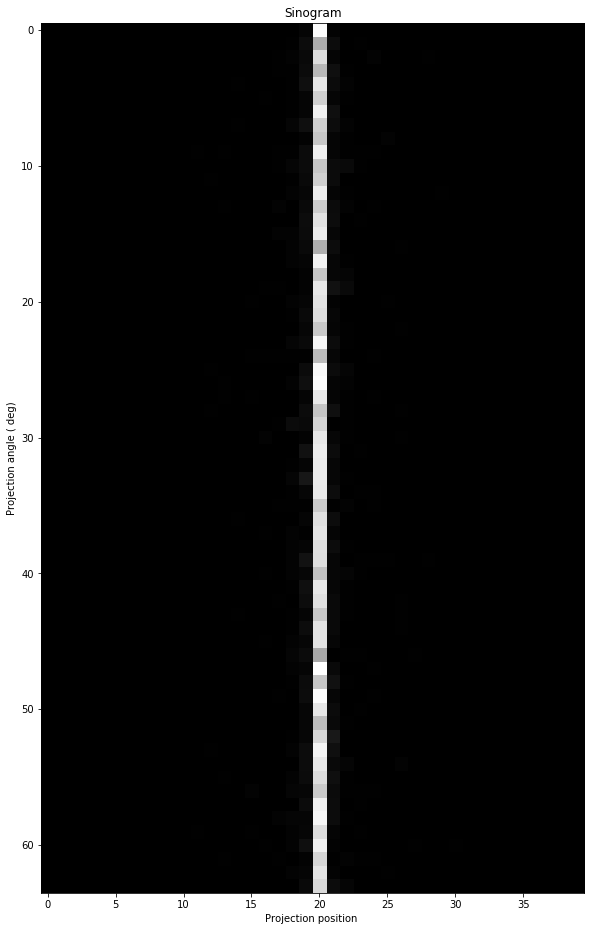

In [19]:
draw_sinogram(64,40,break_flag=True,y=0,x=0)

In [20]:
def cal_angle1 (det1,det2):
    
    det_x1 = det1[0]
    det_y1 = det1[1]
    det_z1 = det1[2]
    det_x2 = det2[0]
    det_y2 = det2[1]
    det_z2 = det2[2]
    det_x1 = float(det_x1)
    det_y1 = float(det_y1)
    det_z1 = float(det_z1)
    det_x2 = float(det_x2)
    det_y2 = float(det_y2)
    det_z2 = float(det_z2)
    a = det_x1 - det_x2
    b = det_y1 - det_y2
    c = det_x2 - det_x1
    d = det_y2 - det_y1
    distance = float(zero_to_head_len + crystal_x_len/2 ) *2  #  float(zero_to_head_len + crystal_x_len/2 )  디텍터 반지름
    theta = math.atan( ( det_z1 - det_z2 )/ distance)
    
    if b == 0 :
        phi = 90*math.pi/180
        radius = det_y1
        

        
    else:
        phi = math.atan(- a / b)
        
        if a == 0:
            phi = 0
            radius = det_x1
        else:
            radius = -(b / a) * det_x1 * math.sin(phi) + det_y1 * math.sin(phi)
    
    result = [radius, phi, theta]
    return  result

In [21]:
def cal_coincidence1(data):
    final_data_2=np.array(final_data_1)
    record = []
    result = []
    for i in range(0,len(final_data_1)-1):
        record.append(cal_angle1(final_data_2[i][0],final_data_2[i][1]))

    Theta = math.atan(crystal_z_len/( float(zero_to_head_len + crystal_x_len/2 ) *2))
   
 #   for i in range (0,len(record)):
  #      if (np.array(record)[:][i][2]>= -Theta) or (np.array(record)[:][i][2]<= Theta):
   #         result.append(np.array(record)[:][i][:])
    data = np.array(record)
    
    return data

In [22]:
def cal_sinogram1 (data,size_x = 91, size_y = 180):
    
    Phi = [] # R Phi Theta 값 중에서 Phi 값 만을 뽑기 위해 만든 리스트
    R = []  #R Phi Theta 값 중에서 R 값 만을 뽑기 위해 만든 리스트
    
    for i in range(0,len(data)):
        Phi.append(math.degrees(data[:][i][1]))
        R.append(data[:][i][0])
    Phi_degrees = np.array(Phi)
    radius = np.array(np.array(R)+float(zero_to_head_len +crystal_x_len/2)) # 음수 값을 없애주기 위해서 반지름을 더함    
    radius[Phi_degrees < 0] = radius[Phi_degrees < 0] *(-1)
    Phi_degrees[Phi_degrees < 0 ] = Phi_degrees[Phi_degrees < 0 ] + 180 # 음수인 각도들을 180도를 더해줘서 바꿔준다.
    
    
 
    trans_degree = np.round(size_y *Phi_degrees/180)
    trans_radius = np.round(size_x *radius/( float(zero_to_head_len + crystal_x_len/2 ) *2))
    
    trans_radius[trans_degree>(size_y-1)] = trans_radius[trans_degree>(size_y-1)] * (-1)
    trans_degree[trans_degree>(size_y-1)] =trans_degree[trans_degree>(size_y-1)] - size_y
        
    
    image = np.zeros((size_y,size_x)) 
        # Sinogram 이미지를 만들기위해서 빈 이미지를 만들어준다.
        
    for i in range(0, len(trans_degree)):
            image[int(trans_degree[i])][int(trans_radius[i])] = image[int(trans_degree[i])][int(trans_radius[i])] + 1
    
#    print(image.max())
#    print("image 모양")
#    print(image.shape)
#    print("coincidence 개수")
#    print(trans_degree.shape)
#    print(trans_radius.shape)
#    print("trans_degree 최대 최소값")
#    print(trans_degree.max())
#    print(trans_degree.min())
#    print("trans_radius 최대 최소값")
#    print(trans_radius.max())
#    print(trans_radius.min())
    
    return image   

In [23]:
def draw_sinogram_custom(size_x , size_y):
    image = cal_sinogram1(cal_coincidence1(final_data_1),size_y,size_x)
    print("image의 최대 intensity")
    print(image.max())
    print("image 모양")
    print(image.shape)
    fig, (ax1) = plt.subplots(1, 1, figsize = (16,16))
    ax1.set_title("Sinogram")
    ax1.set_xlabel("Projection position ")
    ax1.set_ylabel("Projection angle ( deg)")
    vmax_input = input("vmax = ")
    plt.imshow(image, cmap=plt.cm.Greys_r, vmax = vmax_input)


image의 최대 intensity
152.0
image 모양
(64, 40)
vmax = 1


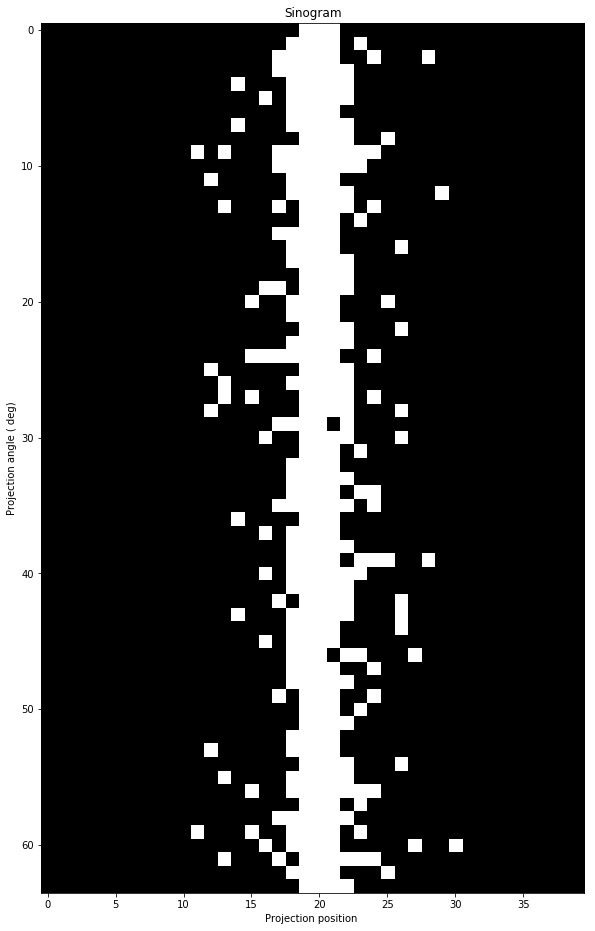

In [25]:
draw_sinogram_custom(64,40)